# **NYPD Hate Crime Analysis**
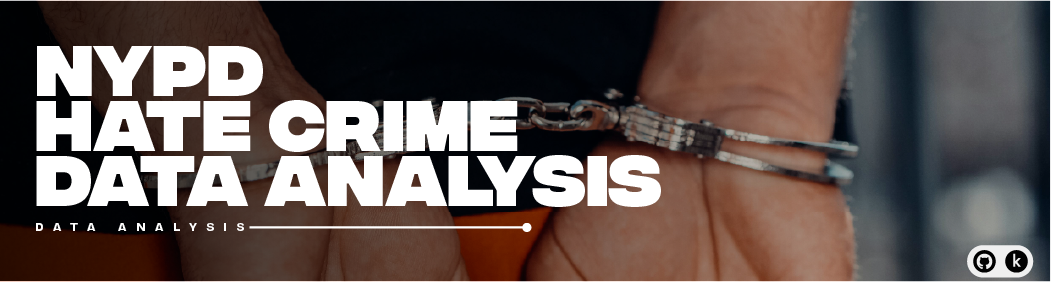

This project is an analysis of the crimes in **NYPD** over various factors. The data has been sourced from [**this**](https://www.kaggle.com/datasets/manjitbaishya001/nypd-hate-crimes) Kaggle dataset and the corresponding [**Kaggle**](https://www.kaggle.com/code/manjitbaishya001/nypd-hate-crime-eda) notebook has been also linked.

## **About the Dataset**
The dataset has not been cleaned before hand. It has been originally sourced from [**data.gov**](https://catalog.data.gov/dataset/nypd-hate-crimes). It provides a list of **Hate Crimes** conducted by people in **NYPD.** It comprises of `13` features. Some of them are:
- **Full Complaint ID:** Provides a unique complaint ID
- **Complaint Year Number:** Year of complaint
- **Month Number:** Month of complaint
- **Record Create Date:** Date of record creation
- **Complaint Precinct Code:** Code of complaint precinct code

NYPD hate crime data analysis delves into uncovering trends in the data, both in terms of temporal patterns, like changes over time, and geospatial distribution, identifying areas with higher concentrations of hate crimes. Examining the details of the data, including offense types, associated law codes, bias motivations behind the crimes, and arrest trends, provides a deeper understanding of the nature of these incidents and how law enforcement responds.

# **Importing Libraries and Data**
---
Here, we will import all the required `libraries` for the project and all the `source files` necessary.

In [1]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing source file
df = pd.read_csv("nypd_hate_crimes.csv")
df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


This data need to be furthur `cleaned` and `processeed` before performing any analysis on it.

# **Data Cleaning**
---
In this section, we clean data of all `null values` with appropriate measures.

In [3]:
# looking at column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              2406 non-null   int64  
 1   Complaint Year Number          2406 non-null   int64  
 2   Month Number                   2406 non-null   int64  
 3   Record Create Date             2406 non-null   object 
 4   Complaint Precinct Code        2406 non-null   int64  
 5   Patrol Borough Name            2406 non-null   object 
 6   County                         2406 non-null   object 
 7   Law Code Category Description  2406 non-null   object 
 8   Offense Description            2406 non-null   object 
 9   PD Code Description            2406 non-null   object 
 10  Bias Motive Description        2406 non-null   object 
 11  Offense Category               2406 non-null   object 
 12  Arrest Date                    0 non-null      f

There are a total of `2406` rows and `13` columns.

**`NOTE:`** **Arrest Date** and **Arrest Id** are to be removed as the total number of data points are very low.

# **Data Pre-Processing**
---

## **1. Selecting relevant columns only**
Here, we select only the required columns.

In [4]:
# looking at column names
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

In [5]:
# dropping columns
df = df[['Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name', 'County', 'Law Code Category Description', 'Offense Description',
       'Bias Motive Description', 'Offense Category']]

In [6]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice


## **2. Extracting date-time data**
We extract `Date`, `Month` and `Year` information from the provided date-time data. 

In [7]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice


In [8]:
# converting date to date-time format
df['record_date'] = pd.to_datetime(df['Record Create Date'], format='mixed')

# extract week of the day, date, month, and year into separate columns
df['date'] = df['record_date'].dt.day
df['day'] = df['record_date'].dt.strftime('%a')
df['month'] = df['record_date'].dt.strftime('%b')
df['year'] = df['record_date'].dt.year

In [9]:
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category,record_date,date,day,month,year
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2022-03-07,7,Mon,Mar,2022
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2020-02-08,8,Sat,Feb,2020
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2023-05-23,23,Tue,May,2023
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2023-04-02,2,Sun,Apr,2023
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice,2023-05-01,1,Mon,May,2023


In [10]:
# ordering features list
df = df[['date', 'month', 'year', 'day', 'record_date', 'Patrol Borough Name', 'County', 'Law Code Category Description',
         'Bias Motive Description', 'Offense Category', 'Complaint Precinct Code']]

df.head()

,date,month,year,day,record_date,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category,Complaint Precinct Code
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


## **3. Renaming Columns**
We rename the columns to something simple

In [11]:
# looking at current column names
df.columns

Index(['date', 'month', 'year', 'day', 'record_date', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Bias Motive Description',
       'Offense Category', 'Complaint Precinct Code'],
      dtype='object')

In [12]:
# renaming columns
df.columns = ['date', 'month', 'year', 'day', 'record_date', 'patrol', 'county', 'crime', 'motive', 'offense', 'precinct']

In [13]:
df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


## **4. Reconfiguring Data**
We make the data a little simpler to comprehend by renaming the column data as per the directions provided below.

In [14]:
patrol_mapping = {
    'PATROL BORO BKLYN NORTH': 'Brooklyn_N',
    'PATROL BORO BKLYN SOUTH': 'Brooklyn_S',
    'PATROL BORO MAN SOUTH': 'Man_S',
    'PATROL BORO MAN NORTH': 'Man_N',
    'PATROL BORO QUEENS SOUTH': 'Queens_S', 
    'PATROL BORO QUEENS NORTH': 'Queens_N',
    'PATROL BORO BRONX': 'Bronx', 
    'PATROL BORO STATEN ISLAND': 'Staten'
}

# Replace values using the dictionary
df['patrol'] = df['patrol'].replace(patrol_mapping)

offense_mapping = {
    'Religion/Religious Practice' : 'Religion', 
    'Race/Color' : 'Race',
    'Ethnicity/National Origin/Ancestry' : 'Origin', 
    'Gender' : 'Gender',
    'Sexual Orientation' : 'Orientation', 
    'Disability' : 'Diabled', 
    'Age' : 'Age'
}

# Replace values using the dictionary
df['offense'] = df['offense'].replace(offense_mapping)
df['motive'] = df['motive'].str.capitalize()
df['county'] = df['county'].str.capitalize()
df['crime'] = df['crime'].str.capitalize()

df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
0,7,Mar,2022,Mon,2022-03-07,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
1,8,Feb,2020,Sat,2020-02-08,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
2,23,May,2023,Tue,2023-05-23,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
3,2,Apr,2023,Sun,2023-04-02,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
4,1,May,2023,Mon,2023-05-01,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60


## **5. Converting `Precinct` data to String**
This need to be done in order to avoid problems during visualization.

In [15]:
df['precinct'] = df['precinct'].astype(str)

In [16]:
# checking data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2406 non-null   int32         
 1   month        2406 non-null   object        
 2   year         2406 non-null   int32         
 3   day          2406 non-null   object        
 4   record_date  2406 non-null   datetime64[ns]
 5   patrol       2406 non-null   object        
 6   county       2406 non-null   object        
 7   crime        2406 non-null   object        
 8   motive       2406 non-null   object        
 9   offense      2406 non-null   object        
 10  precinct     2406 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 188.1+ KB


## **6. Sorting as per date**
Here, we sort our data as per the `record_date`.

In [17]:
df = df.sort_values(by='record_date').reset_index(drop=True)
df.drop('record_date', axis = 1, inplace = True)

df.head()

,date,month,year,day,patrol,county,crime,motive,offense,precinct
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Religion,71
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Origin,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Orientation,5


# **Exploratory Data Analysis(EDA)**
---

## **1. Yearly Trend**
Plotting the frequency of crime over the years using a `countplot`.

In [18]:
# checking at data
df['year'].value_counts()

year
2022    669
2021    577
2019    445
2023    429
2020    286
Name: count, dtype: int64

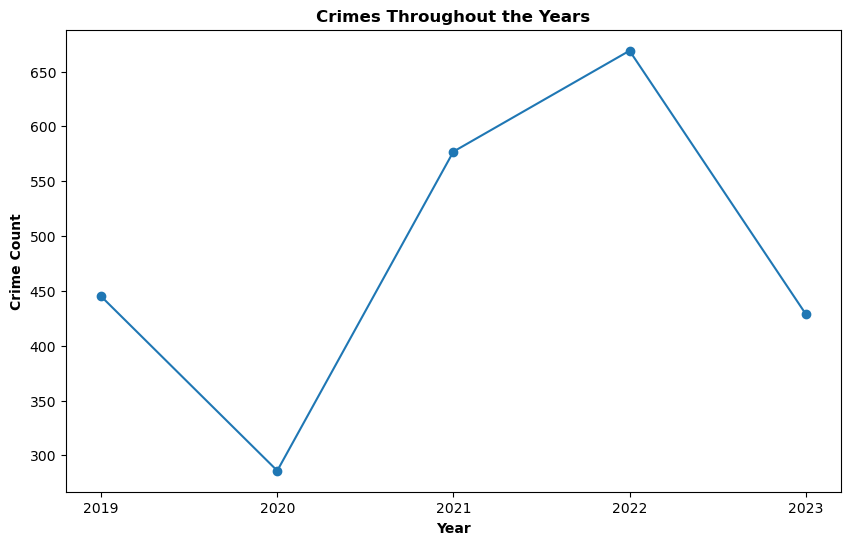

In [19]:
# counting the occurrences of each date
counts = df['year'].value_counts().sort_index()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Crimes Throughout the Years', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

# specifying x-axis labels
plt.xticks([2019, 2020, 2021, 2022, 2023])

# plot
plt.show()

`CONCLUSION`: The rate of crimes have seen a significant rise from `2019` to `2022` but has significantly decreased in `2023`.

## **2. Monthly Trend**
Plotting the frequency of crime over the `months` throughout the years using a `countplot`.

In [20]:
# checking count data
df['month'].value_counts()

month
Mar    274
May    266
Jun    244
Apr    216
Feb    209
Jul    204
Aug    195
Sep    191
Jan    169
Oct    165
Nov    141
Dec    132
Name: count, dtype: int64

Here, we will encounter jumbled order of months and so we need to fix it.

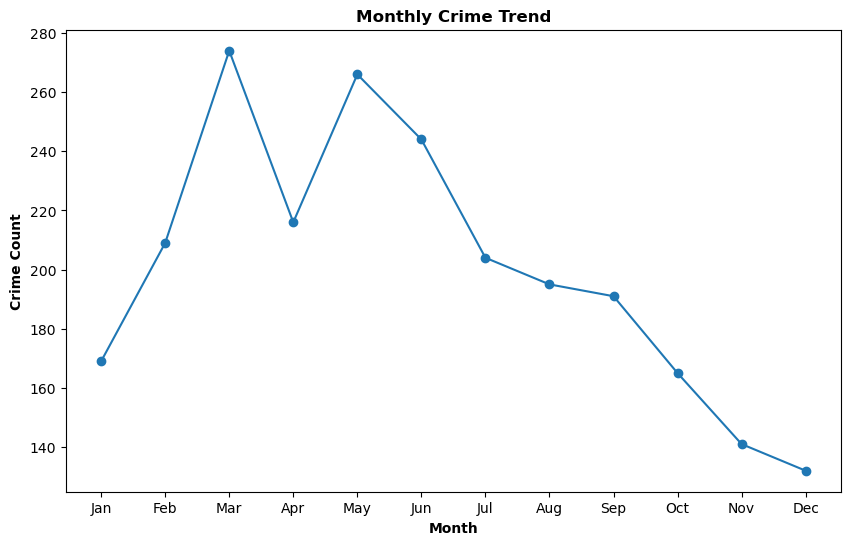

In [21]:
# defining the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# convert 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered=True)

# count the occurrences of each month
counts = df['month'].value_counts().sort_index()

# plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# setting title and y-axis label
plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

#  plotting
plt.show()

`CONCLUSION`: The crimes can be seen `increasing` through the `start` of the year to the `middle` and then gradually decreases.

## **3. Monthly trend per Year**
In order to dive a little deeper, we will analyse the `Monthly Trend` for each `individual` year.

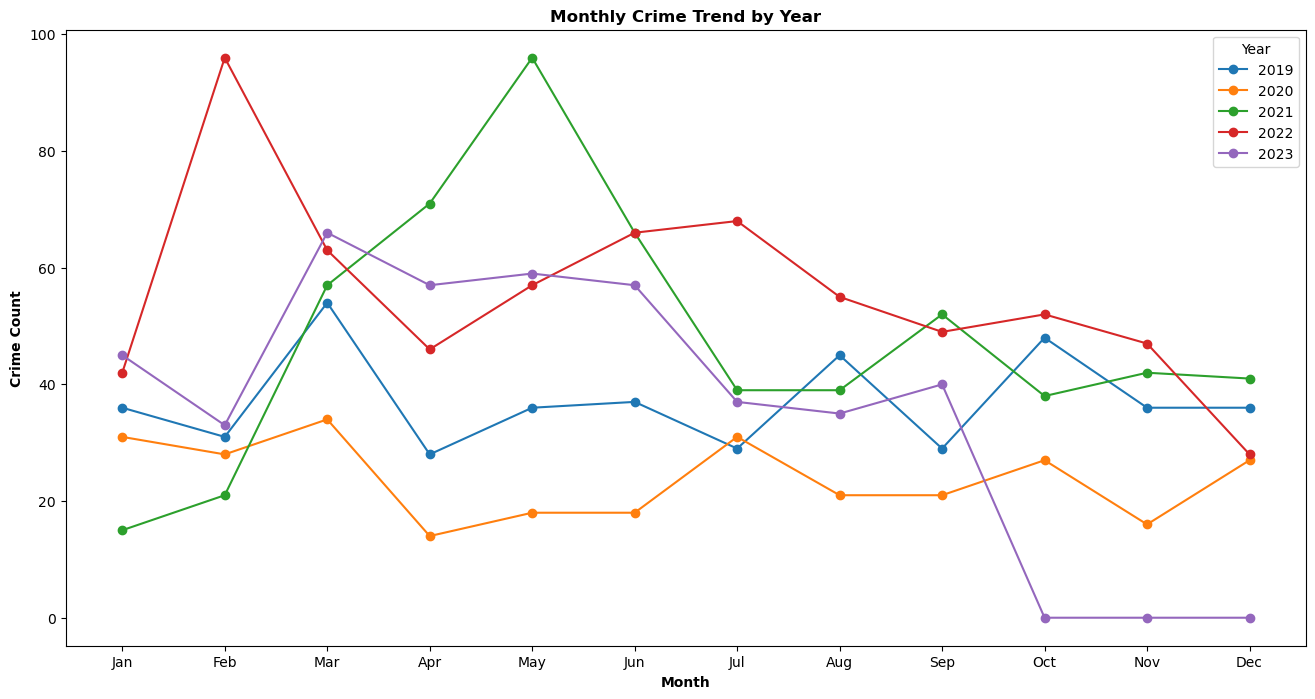

In [22]:
# defining correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# converting 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)

# counting the occurrences of each month
counts = df['month'].value_counts().sort_index()

# extracting unique years from the 'year' column
unique_years = df['year'].unique()

# plotting separate line plots for each year
plt.figure(figsize=(16, 8))
for year in unique_years:
    # data for the current year
    year_data = df[df['year'] == year]
    
    # counting the occurrences of each month for the current year
    year_month_counts = year_data['month'].value_counts().sort_index()
    
    # plotting the line plot for the current year
    plt.plot(year_month_counts.index, year_month_counts.values, marker='o', linestyle='-', label=str(year))

# title and axis labels
plt.title('Monthly Crime Trend by Year', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

# adding legend
plt.legend(title='Year')

# showing the plot
plt.show()


`CONCLUSION:` It can be seen that almost all of the years follow a similar pattern but `2021` and `2022` are a little different at the starting of the years respectively and then later saturate.

## **4. Weekly Trend**
Plotting the frequency of crime over the `weekdays` using a `countplot`.

In [23]:
# checking counts
df['day'].value_counts()

day
Tue    385
Thu    359
Fri    354
Mon    349
Sun    337
Wed    331
Sat    291
Name: count, dtype: int64

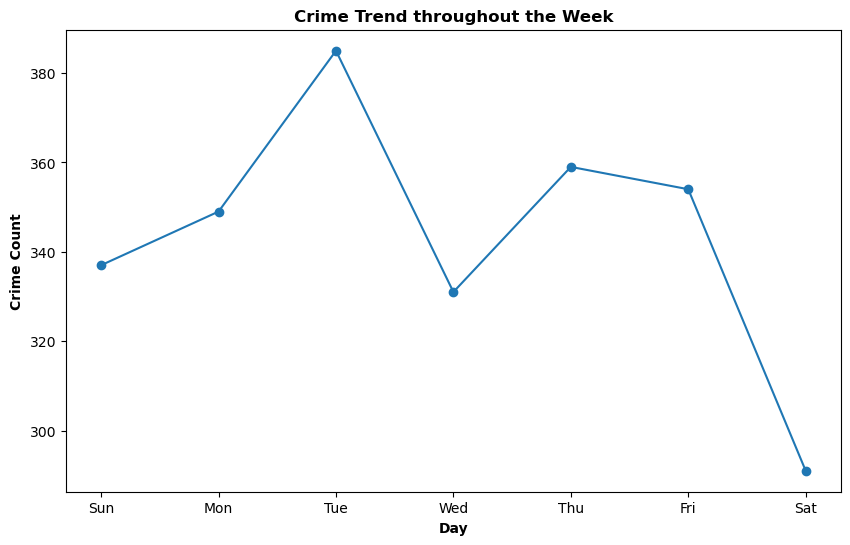

In [24]:
# define the correct order of weekdays
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# converting 'day' column to categorical with correct order
df['day'] = pd.Categorical(df['day'], categories = day_order, ordered=True)

# counting the occurrences of each day
counts = df['day'].value_counts().sort_index()

# plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Crime Trend throughout the Week', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Day', fontweight='bold')

# showing the plot
plt.show()

`CONCLUSION:` Crimes rise at the start of the week and fall over the end of the week.

## **5. Patrol Crime Counts**
Here, we plot the total number of crimes encountered and registerd by the respective patrols.

In [25]:
# checking counts
df['patrol'].value_counts()

patrol
Man_S         557
Brooklyn_S    445
Brooklyn_N    374
Man_N         320
Queens_N      287
Bronx         169
Queens_S      164
Staten         90
Name: count, dtype: int64

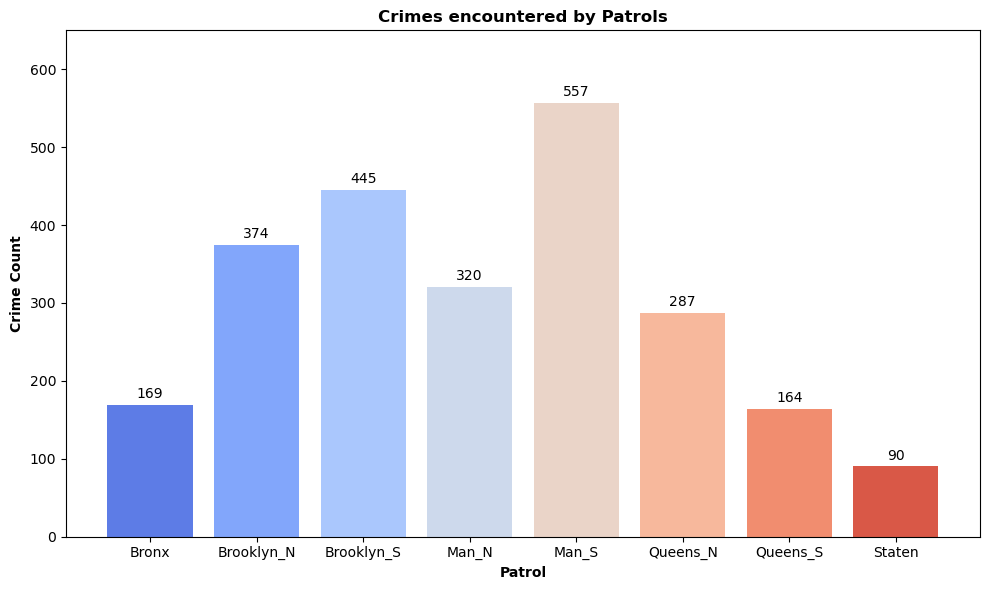

In [26]:
# counting Crime Counts as per patrol
counts = df['patrol'].value_counts().sort_index()

# getting the number of unique patrols
num_patrols = len(counts)

# setting seaborn colormap to 'coolwarm'
colors = sns.color_palette("coolwarm", num_patrols)

# bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color = colors)

# setting title and y-axis label
plt.title('Crimes encountered by Patrols', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Patrol', fontweight='bold')

# setting max limit on y-axis
plt.ylim(0, 650)

# adding annotations above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# plotting
plt.tight_layout()
plt.show()


`CONSLUSION:` Hence, **Manhattan South Patrol** has the encountered the `highest` number of crimes whereas **Staten Island** has encountered the `lowest`.

## **6. Crimes throughout Counties**
We analyse crime distribution throughout the `counties`.

In [27]:
df['county'].value_counts()

county
New york    877
Kings       819
Queens      451
Bronx       169
Richmond     90
Name: count, dtype: int64

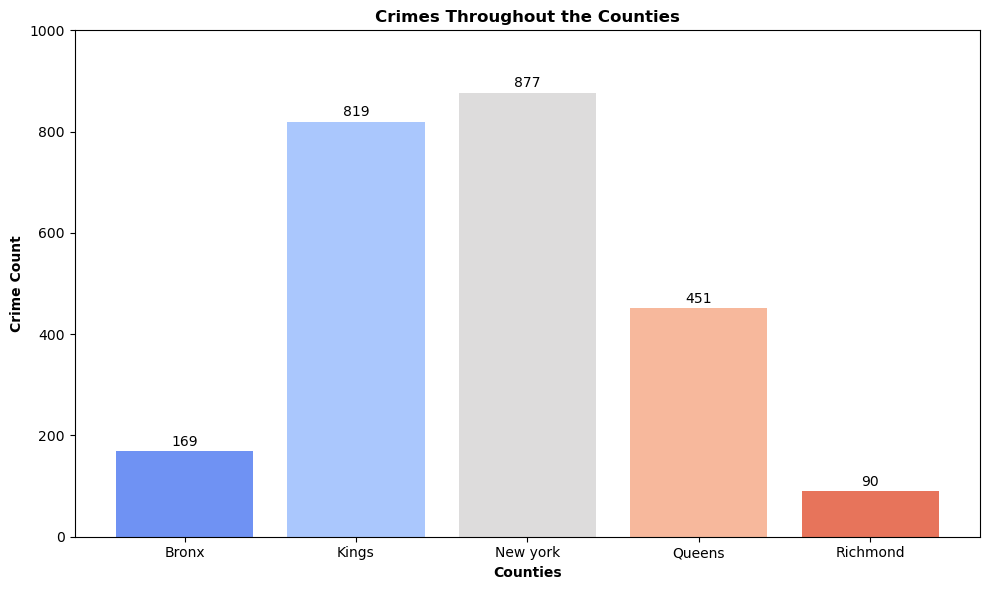

In [28]:
# counting Crime Counts as per counties
counts = df['county'].value_counts().sort_index()

# getting the number of unique counties
num_counties = len(counts)

# seaborn colormap to 'coolwarm'
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)
plt.title('Crimes Throughout the Counties', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Counties', fontweight = 'bold')

# setting max limit on y-axis
plt.ylim(0, 1000)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# plot
plt.tight_layout()
plt.show()

`CONCLUSION:` `New York` and `Kings` counties have the highest number of crimes recorded.

## **7. Crime distribution by category**
We analyse crime distribution by `categories`.

In [29]:
df['crime'].value_counts()

crime
Misdemeanor      1232
Felony           1152
Violation          20
Investigation       2
Name: count, dtype: int64

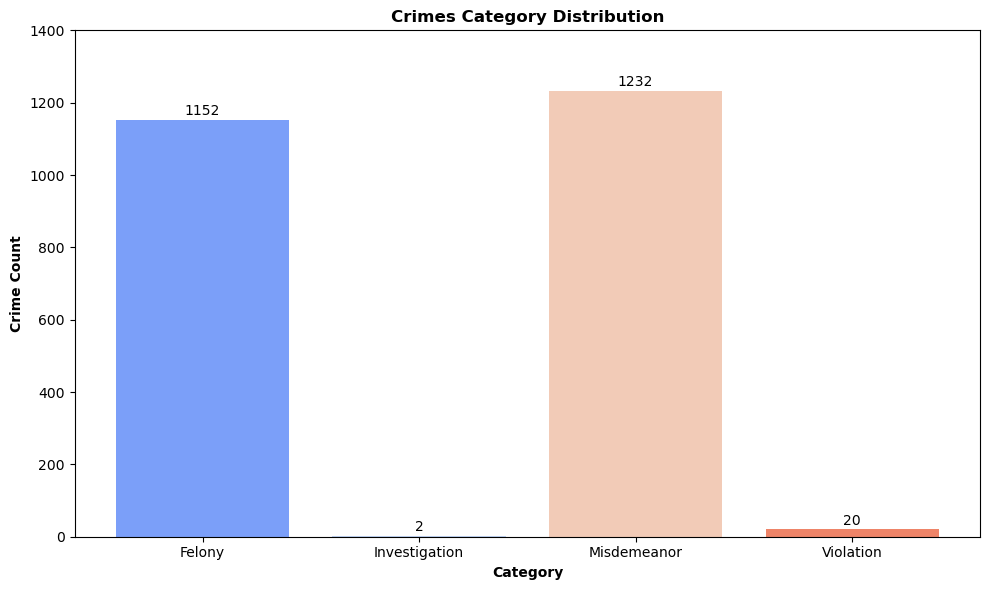

In [30]:
counts = df['crime'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes Category Distribution', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Category', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`CONCLUSION:` The most common crimes are `Felony` and `Misdemeanor`.

## **8. Crime distribution by Motive**
Here, we see the distribution of crime as per the `motive`.

In [31]:
# checking data
df['motive'].value_counts()

motive
Anti-jewish                          1034
Anti-male homosexual (gay)            318
Anti-asian                            317
Anti-black                            211
Anti-white                             97
Anti-other ethnicity                   93
Anti-transgender                       63
Anti-muslim                            63
Anti-hispanic                          61
Anti-catholic                          44
Anti-female homosexual (lesbian)       33
Anti-female                            14
Anti-lgbt (mixed group)                11
Anti-gender non-conforming              8
Anti-arab                               7
Anti-hindu                              6
Anti-other religion                     5
Anti-sikh                               4
Anti-buddhist                           3
Anti-multi-racial groups                3
Anti-religious practice generally       3
Anti-jehovahs witness                   2
Anti-eastern orthodox                   2
Anti-protestant            

In [32]:
# picking top 7 motives
counts = df['motive'].value_counts()
counts.head(5)

motive
Anti-jewish                   1034
Anti-male homosexual (gay)     318
Anti-asian                     317
Anti-black                     211
Anti-white                      97
Name: count, dtype: int64

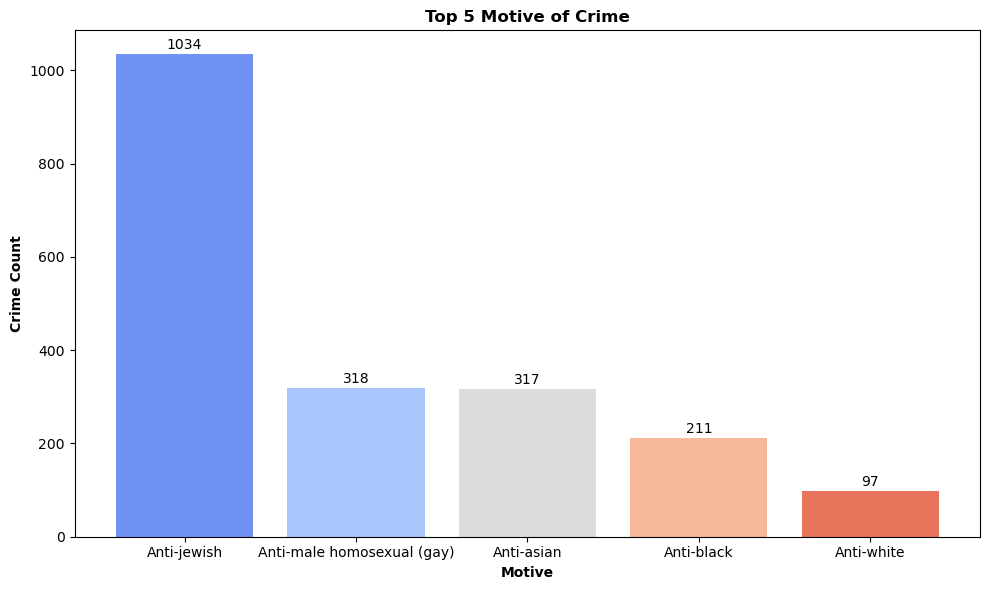

In [33]:
counts = df['motive'].value_counts()
top_5_counts = counts.head(5)

colors = sns.color_palette("coolwarm", len(top_5_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values, color=colors)

plt.title('Top 5 Motive of Crime', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Motive', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

`CONCLUSION:` `Anti-Jewish` is the most common motive of crime.

## **9. Crime distribution by Offense**
Here, we see the distribution of crime as per the `offense`.

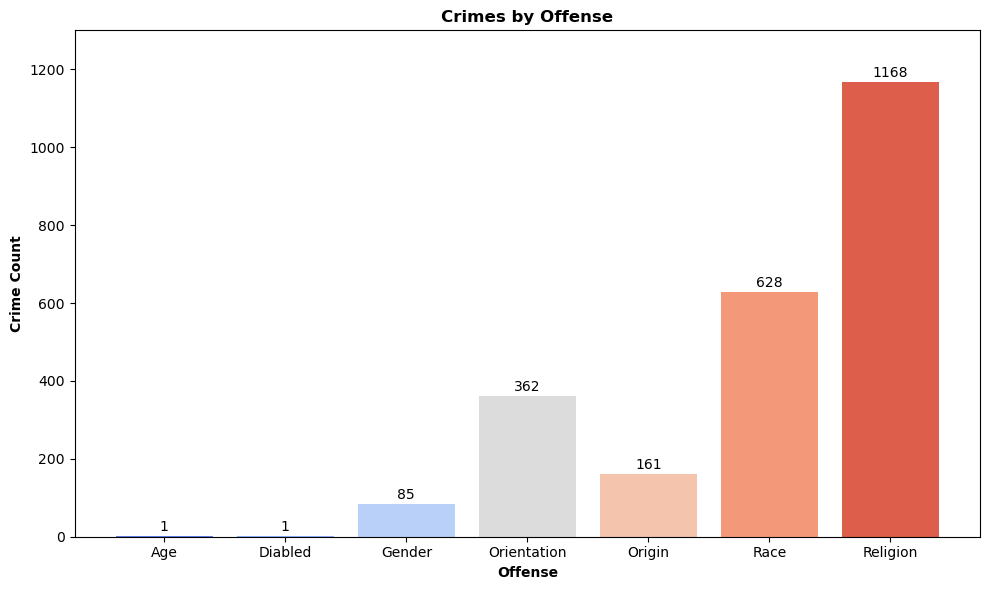

In [34]:
counts = df['offense'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes by Offense', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Offense', fontweight = 'bold')
plt.ylim(0, 1300)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`CONCLUSION:` `Religion` is the most common offense of crime.

## **10. Most common Precinct**
We analyse the distribution of crime throughout the `Precincts`.

In [35]:
df['precinct'].value_counts()

precinct
90     106
14      87
18      73
19      72
13      70
      ... 
105      8
43       7
47       6
41       6
69       3
Name: count, Length: 77, dtype: int64

In [36]:
# top 5 precincts 
top_precincts = df['precinct'].value_counts()
top_precincts.head(5)

precinct
90    106
14     87
18     73
19     72
13     70
Name: count, dtype: int64

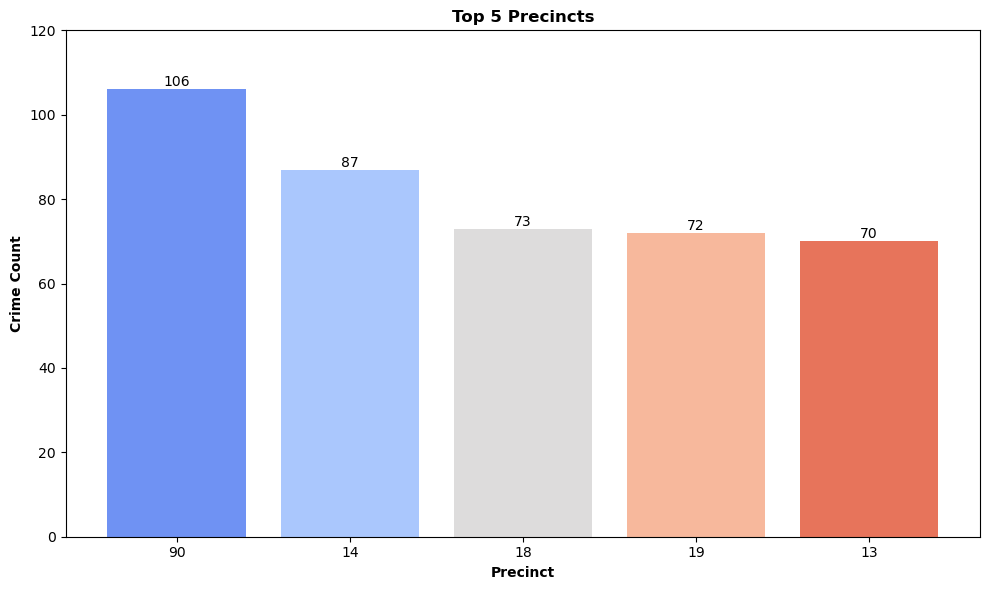

In [37]:
counts = df['precinct'].value_counts()
top_5_counts = counts.head(5)

colors = sns.color_palette("coolwarm", len(top_5_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values, color=colors)

plt.title('Top 5 Precincts', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Precinct', fontweight = 'bold')

plt.ylim(0, 120)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

`CONCLUSION:` Thus, `Precinct 90` has been the one with the most criminal cases encountered.

# **Conclusion**
A comprehensive analysis have been provided above with all possible aspects of exploration. Any form of feedback is appreciated.

# **THANK YOU**
---